# Extracting zip file for train_images

In [ ]:
import zipfile
import os
def extract_zip(file_path: str, extract_to: str):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
file_path = '../Data/archive.zip'
extract_to = '../Data/train_images'
extract_zip(file_path, extract_to)

In [ ]:
pip install pyarrow

   ---------------------------------------- 0.0/25.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.9 MB 217.9 kB/s eta 0:01:59
   ---------------------------------------- 0.0/25.9 MB 217.9 kB/s eta 0:01:59
   ---------------------------------------- 0.1/25.9 MB 292.6 kB/s eta 0:01:29
   ---------------------------------------- 0.1/25.9 MB 454.0 kB/s eta 0:00:57
   ---------------------------------------- 0.2/25.9 MB 778.2 kB/s eta 0:00:34
   ---------------------------------------- 0.3/25.9 MB 930.9 kB/s eta 0:00:28
    --------------------------------------- 0.4/25.9 MB 1.2 MB/s eta 0:00:22
    --------------------------------------- 0.5/25.9 MB 1.2 MB/s eta 0:00:21
    --------------------------------------- 0.6/25.9 MB 1.4 MB/s eta 0:00:19
   - -------------------------------------- 0.8/25.9 MB 1.7 MB/s eta 0:00:15
   - -------------------------------------- 1.2/25.9 MB 2.2 MB/s eta 0:00:12
 

In [ ]:
pip install fastparquet

   ---------------------------------------- 0.0/671.0 kB ? eta -:--:--
   -- ------------------------------------ 41.0/671.0 kB 991.0 kB/s eta 0:00:01
   -------------- ------------------------- 235.5/671.0 kB 2.9 MB/s eta 0:00:01
   --------------------------- ------------ 460.8/671.0 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 671.0/671.0 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.6 MB 9.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.7/1.6 MB 8.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 8.3 MB/s eta 0:00:01
   ------------------------------------- -- 1.5/1.6 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/176.9 kB ? eta -:--:--
   --------- ------------------------------ 41.0/176.9 kB ? eta -:--:--
   --------------

In [ ]:
pip install pydicom

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 991.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.8 MB 3.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 4.3 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.8 MB 5.4 MB/s eta 0:00:01
   --------------------------------- ------ 1.5/1.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imageio


  Using cached imageio-2.34.1-py3-none-any.whl.metadata (4.9 kB)
Using cached imageio-2.34.1-py3-none-any.whl (313 kB)


In [ ]:
pip install pillow


Note: you may need to restart the kernel to use updated packages.


In [4]:
! pip install SimpleITK

In [2]:
! pip install ipywidgets

  Using cached ipywidgets-8.1.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.11-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.3-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.11-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.11-py3-none-any.whl (2.3 MB)


# EDA

In [10]:
import numpy as np
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML, display
import ipywidgets as widgets
import seaborn as sns
from glob import glob
import SimpleITK as sitk
import warnings
warnings.simplefilter("ignore")
import random
import nibabel as nib

In [5]:
# Get the current working directory
base_dir = os.getcwd()
base_dir

'e:\\MS_AI_ML\\Dissertation\\Abdominal\\Notebooks'

In [6]:
# Load the datasets
train_df = pd.read_csv("../Inputs/train.csv")
series_meta_df = pd.read_csv('../Inputs/train_series_meta.csv')
image_labels_df = pd.read_csv('../Inputs/image_level_labels_2024.csv')

## 1. train.csv

In [40]:
# Display the first few rows of each dataset
print("First few rows of train.csv:")
train_df.head()

First few rows of train.csv:


,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,1,0,-1,1,0
1,10005,0,1,1,1,1,1
2,10007,0,1,1,1,1,1
3,10026,0,1,1,1,1,1
4,10051,1,1,1,1,1,-1


In [41]:
print("No. of unique Patient ID's = ", train_df['patient_id'].nunique())

No. of unique Patient ID's =  3147


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   patient_id     3147 non-null   int64
 1   any_injury     3147 non-null   int64
 2   bowel          3147 non-null   int64
 3   extravasation  3147 non-null   int64
 4   kidney         3147 non-null   int64
 5   liver          3147 non-null   int64
 6   spleen         3147 non-null   int64
dtypes: int64(7)
memory usage: 172.2 KB


In [43]:
# Check for missing values and their proportion in each dataset
print("Missing values in train.csv:\n")
print(train_df.isnull().sum())
print(train_df.isnull().mean(), '\n')

Missing values in train.csv:

patient_id       0
any_injury       0
bowel            0
extravasation    0
kidney           0
liver            0
spleen           0
dtype: int64
patient_id       0.0
any_injury       0.0
bowel            0.0
extravasation    0.0
kidney           0.0
liver            0.0
spleen           0.0
dtype: float64 



In [44]:
# Get summary statistics for numerical columns
print("Summary statistics for train.csv:\n")
train_df.describe()

Summary statistics for train.csv:



,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000
mean,32664.239593,0.289164,0.977439,0.931681,0.886241,0.805211,0.815062
std,18792.043458,0.453446,0.148523,0.252333,0.436449,0.574847,0.533185
min,19.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,16355.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,32195.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,49302.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,65508.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
train_df['bowel'] = train_df[['bowel_healthy', 'bowel_injury']] .idxmax(axis=1)
train_df['extravasation'] = train_df[['extravasation_healthy', 'extravasation_injury']] .idxmax(axis=1)
train_df['kidney'] = train_df[['kidney_healthy', 'kidney_low','kidney_high']] .idxmax(axis=1)
train_df['liver'] = train_df[['liver_healthy', 'liver_low','liver_high']] .idxmax(axis=1)
train_df['spleen'] = train_df[['spleen_healthy', 'spleen_low','spleen_high']] .idxmax(axis=1)
col = ['bowel_healthy','bowel_injury','extravasation_healthy','extravasation_injury','kidney_healthy',
       'kidney_low','kidney_high','liver_healthy','liver_low','liver_high','spleen_healthy','spleen_low','spleen_high']
train_df = train_df.drop(columns =col)
train_df.head()

,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,bowel_healthy,extravasation_injury,kidney_low,liver_healthy,spleen_high
1,10005,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
2,10007,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
3,10026,0,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_healthy
4,10051,1,bowel_healthy,extravasation_healthy,kidney_healthy,liver_healthy,spleen_low


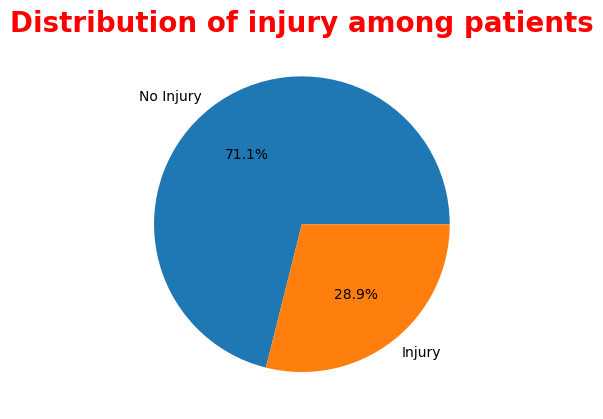

In [32]:
plt.pie(train_df['any_injury'].value_counts(), labels=['No Injury', 'Injury'], autopct='%1.1f%%')
plt.title('Distribution of injury among patients',fontsize=20,color='red', fontweight='bold')  
plt.show()


In [33]:
train_df['bowel'] = train_df['bowel'].replace(['bowel_injury','bowel_healthy'], [0, 1])
train_df['extravasation'] = train_df['extravasation'].replace(['extravasation_injury', 'extravasation_healthy'], [0, 1])
train_df['kidney'] = train_df['kidney'].replace(['kidney_low','kidney_high','kidney_healthy'], [-1,0, 1])
train_df['liver'] = train_df['liver'].replace(['liver_low','liver_high','liver_healthy'], [-1,0, 1])
train_df['spleen'] = train_df['spleen'].replace(['spleen_low','spleen_high','spleen_healthy'], [-1,0,1])
train_df.head()

,patient_id,any_injury,bowel,extravasation,kidney,liver,spleen
0,10004,1,1,0,-1,1,0
1,10005,0,1,1,1,1,1
2,10007,0,1,1,1,1,1
3,10026,0,1,1,1,1,1
4,10051,1,1,1,1,1,-1


In [36]:
# Save the updated DataFrame to a CSV file
train_df.to_csv("../Inputs/eda_train.csv", index=False)
print("Updated DataFrame saved to 'eda_train.csv'")

Updated DataFrame saved to 'eda_train.csv'


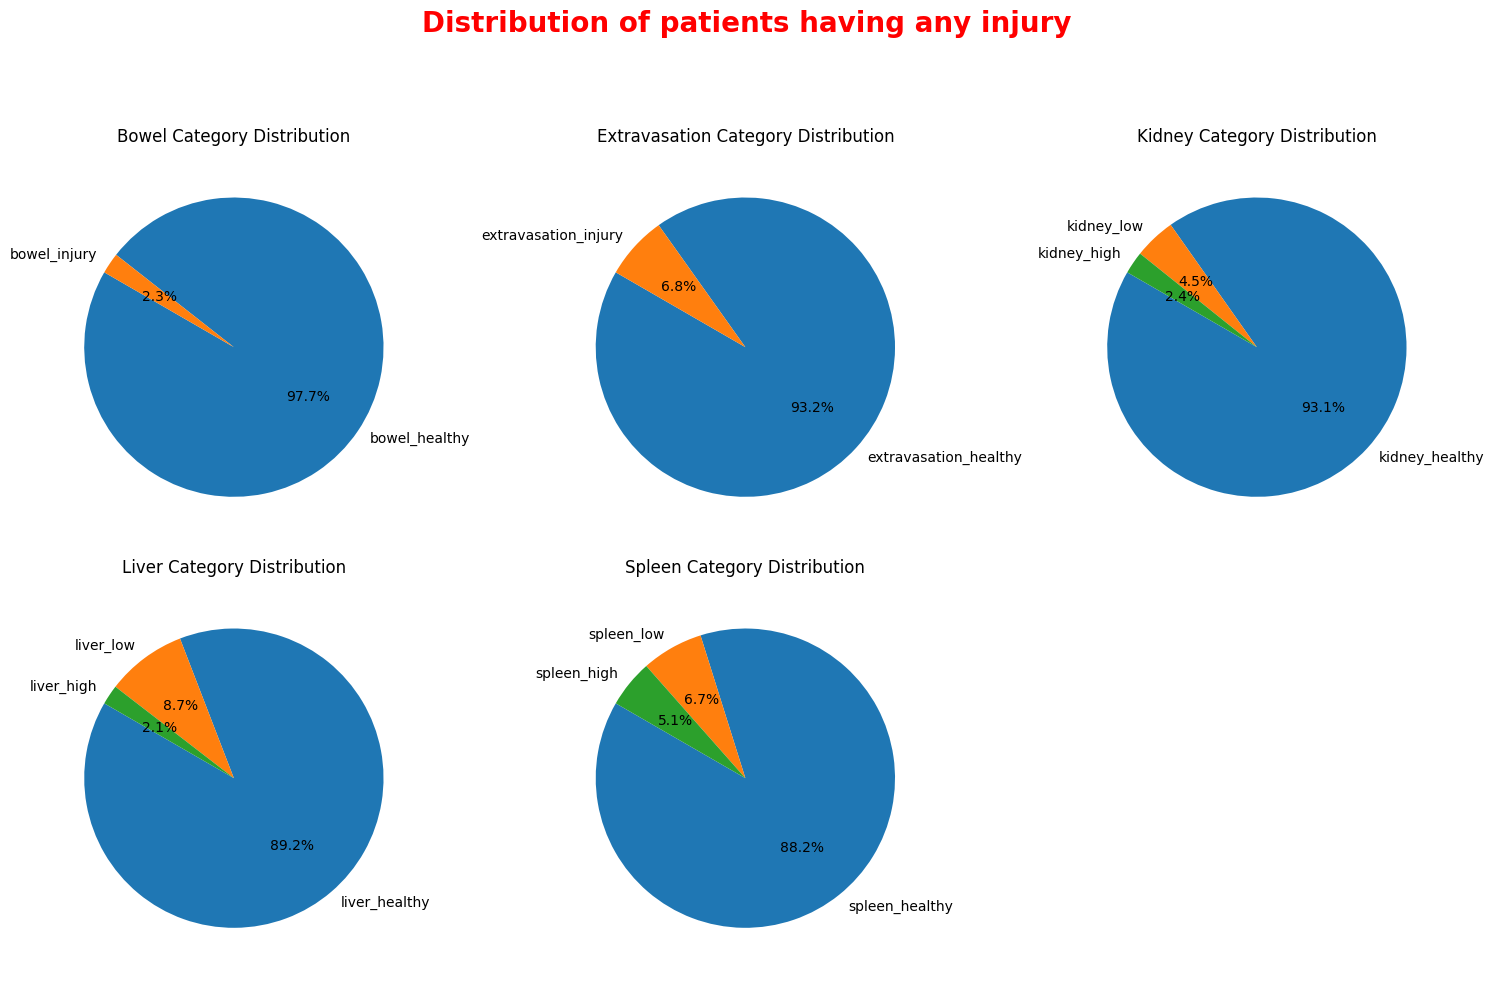

In [37]:
import matplotlib.pyplot as plt
# Create a mapping to convert numerical values back to text labels
label_mapping = {
    'bowel': {0: 'bowel_injury', 1: 'bowel_healthy'},
    'extravasation': {0: 'extravasation_injury', 1: 'extravasation_healthy'},
    'kidney': {-1: 'kidney_low', 0: 'kidney_high', 1: 'kidney_healthy'},
    'liver': {-1: 'liver_low', 0: 'liver_high', 1: 'liver_healthy'},
    'spleen': {-1: 'spleen_low', 0: 'spleen_high', 1: 'spleen_healthy'}
}
# Plot pie charts for each organ category using Seaborn styling
plt.figure(figsize=(15, 10))
# Add an overall title for the subplots
plt.suptitle('Distribution of patients having any injury',fontsize=20,color='red', fontweight='bold')

for i, organ in enumerate(label_mapping.keys()):
    # Convert numerical values back to text labels
    organ_counts = train_df[organ].replace(label_mapping[organ]).value_counts(normalize=True) * 100
    
    # Plot the pie chart
    plt.subplot(2, 3, i + 1)
    plt.pie(organ_counts, labels=organ_counts.index, autopct='%1.1f%%', startangle=150)
    plt.title(f"{organ.capitalize()} Category Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout(rect=[0, 0, 1, 0.92]) 
plt.show()

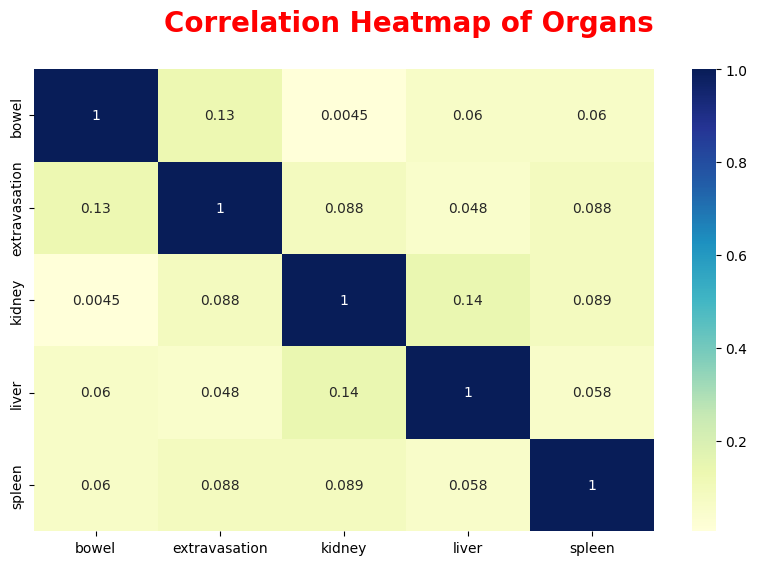

In [38]:
fea=fea=[col for col in train_df.columns if col not in ['patient_id', 'any_injury']]
x=train_df[fea].corr(method='pearson')
plt.figure(figsize=(10,6))
plt.suptitle('Correlation Heatmap of Organs',fontsize=20,color='red', fontweight='bold')
dataplot=sns.heatmap(x,cmap="YlGnBu",annot=True)
plt.show()

## 2. train_series_meta

In [45]:
print("First few rows of train_series_meta.csv:")
series_meta_df.head()

First few rows of train_series_meta.csv:


,patient_id,series_id,aortic_hu,incomplete_organ
0,10004,21057,146.00,0
1,10004,51033,454.75,0
2,10005,18667,187.00,0
3,10007,47578,329.00,0
4,10026,29700,327.00,0


In [47]:
series_meta_df.shape

(4711, 4)

In [48]:
print("Missing values in train_series_meta.csv:\n")
print(series_meta_df.isnull().sum())
print(series_meta_df.isnull().mean(), '\n')

Missing values in train_series_meta.csv:

patient_id          0
series_id           0
aortic_hu           0
incomplete_organ    0
dtype: int64
patient_id          0.0
series_id           0.0
aortic_hu           0.0
incomplete_organ    0.0
dtype: float64 



In [49]:
print("Summary statistics for train_series_meta.csv:\n")
series_meta_df.describe()

Summary statistics for train_series_meta.csv:



,patient_id,series_id,aortic_hu,incomplete_organ
count,4711.000000,4711.000000,4711.000000,4711.000000
mean,32722.826788,32661.752494,223.622373,0.066440
std,18745.299924,18800.490133,103.767762,0.249077
min,19.000000,3.000000,-1024.000000,0.000000
25%,16436.000000,16298.500000,147.000000,0.000000
50%,32235.000000,32387.000000,194.000000,0.000000
75%,49267.500000,48861.500000,280.000000,0.000000
max,65508.000000,65535.000000,1411.000000,1.000000


In [50]:
series_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        4711 non-null   int64  
 1   series_id         4711 non-null   int64  
 2   aortic_hu         4711 non-null   float64
 3   incomplete_organ  4711 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 147.3 KB


In [51]:
series_meta_df.nunique()

patient_id          3147
series_id           4711
aortic_hu            717
incomplete_organ       2
dtype: int64

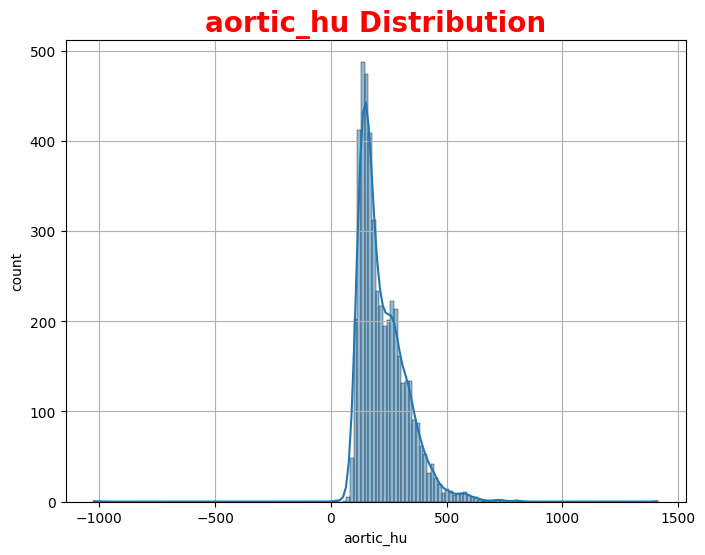

In [52]:
"""
Aortic Hounsfield units (HU) are utilised in CT scans to quantify the density of tissues present in the aorta, which is the primary artery of the body. 
These units aid in the identification of problems such as arterial blockages or calcifications.
The aorta, the biggest artery in the human body, arises from the left ventricle of the heart and runs through the chest and belly. 
It circulates oxygenated blood throughout the body. 
CT scans frequently analyse the aorta for irregularities such as aneurysms, dissections, or atherosclerosis.
"""
plt.figure(figsize=(8, 6))
sns.histplot(series_meta_df['aortic_hu'], kde=True)
plt.title('aortic_hu Distribution',fontsize=20,color='red', fontweight='bold')
plt.xlabel('aortic_hu')
plt.ylabel('count')
plt.grid(True)
plt.show()

In [53]:
series_meta_df[series_meta_df['aortic_hu']<0]

,patient_id,series_id,aortic_hu,incomplete_organ
1742,31284,58351,-1024.0,1


In [55]:
series_meta_df[series_meta_df['aortic_hu']==0]

,patient_id,series_id,aortic_hu,incomplete_organ


In [56]:
series_meta_df[series_meta_df['aortic_hu']>800]

,patient_id,series_id,aortic_hu,incomplete_organ
31,10275,37142,1411.0,0
2740,43774,64536,811.0,0


In [57]:
series_meta_df['aortic_hu'].describe()

count    4711.000000
mean      223.622373
std       103.767762
min     -1024.000000
25%       147.000000
50%       194.000000
75%       280.000000
max      1411.000000
Name: aortic_hu, dtype: float64

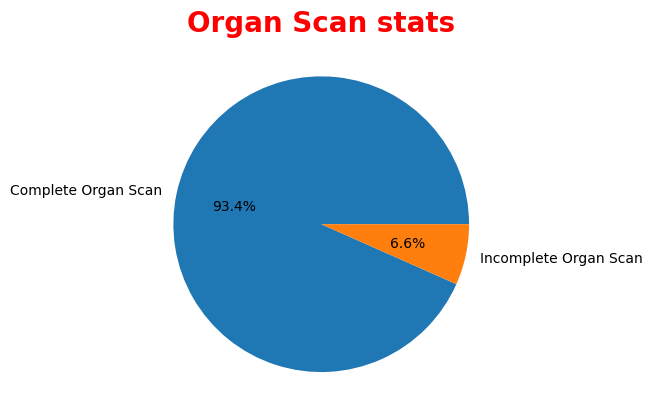

In [58]:
plt.pie(series_meta_df['incomplete_organ'].value_counts(), labels=['Complete Organ Scan','Incomplete Organ Scan'], autopct='%1.1f%%')
plt.title('Organ Scan stats',fontsize=20,color='red', fontweight='bold')
plt.show()
#For the most of the cases scans include complete organs.

## train_dicom_tags.parquet

In [101]:
train_dicom_tags = pd.read_parquet('../Inputs/train_dicom_tags.parquet')
train_dicom_tags.head()

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,...,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path,RescaleType
0,16,16,512,20230722,003306.881589,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1459.20]",532,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.532,1.2.840.10008.1.2.5,train_images/49954/41479/532.dcm,nan
1,16,16,512,20230722,003303.279137,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1474.40]",513,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.513,1.2.840.10008.1.2.5,train_images/49954/41479/513.dcm,nan
2,16,16,512,20230722,003343.090736,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1310.40]",718,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.718,1.2.840.10008.1.2.5,train_images/49954/41479/718.dcm,nan
3,16,16,512,20230722,003252.960345,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1520.00]",456,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.456,1.2.840.10008.1.2.5,train_images/49954/41479/456.dcm,nan
4,16,16,512,20230722,003155.059398,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1756.00]",161,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.161,1.2.840.10008.1.2.5,train_images/49954/41479/161.dcm,nan


In [105]:
train_dicom_tags.shape

(1500653, 35)

### In total we have 1500653 images.

In [90]:
print("Number of rows: ", train_dicom_tags.shape[0])
print("Number of images: ", train_dicom_tags['path'].nunique())

Number of rows:  1500653
Number of images:  1500653


In [91]:
train_dicom_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500653 entries, 0 to 1500652
Data columns (total 35 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   BitsAllocated               1500653 non-null  int64  
 1   BitsStored                  1500653 non-null  int64  
 2   Columns                     1500653 non-null  int64  
 3   ContentDate                 1500653 non-null  object 
 4   ContentTime                 1500653 non-null  object 
 5   FrameOfReferenceUID         1500653 non-null  object 
 6   HighBit                     1500653 non-null  int64  
 7   ImageOrientationPatient     1500653 non-null  object 
 8   ImagePositionPatient        1500653 non-null  object 
 9   InstanceNumber              1500653 non-null  int64  
 10  KVP                         1500653 non-null  float64
 11  PatientID                   1500653 non-null  object 
 12  PatientPosition             1500653 non-null  object 
 1

In [92]:
train_dicom_tags.nunique()

BitsAllocated                       1
BitsStored                          3
Columns                           135
ContentDate                         2
ContentTime                   1499130
FrameOfReferenceUID              3147
HighBit                             3
ImageOrientationPatient           172
ImagePositionPatient          1418128
InstanceNumber                   1971
KVP                                10
PatientID                        3147
PatientPosition                     2
PhotometricInterpretation           1
PixelRepresentation                 2
PixelSpacing                      804
RescaleIntercept                    4
RescaleSlope                        1
Rows                                6
SOPInstanceUID                1208829
SamplesPerPixel                     1
SeriesInstanceUID                4711
SeriesNumber                      134
SliceThickness                     18
StudyInstanceUID                 3147
WindowCenter                        1
WindowWidth 

# Visualising a certian patient CT Scans

In [3]:
# Set the base directory path
base_dir = '../Inputs/train_images/'
# Get all folders in the base directory
all_folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
# Randomly choose five folders from the base directory
random_folders = random.sample(all_folders, min(5, len(all_folders)))  # Select 5 or fewer if not enough folders
# Iterate over each randomly selected folder
for random_folder in random_folders:
    folder_path = os.path.join(base_dir, random_folder)
    # Print patient_id (folder name)
    print(f"Patient ID: {random_folder}")
    # Get all subfolders in the selected folder
    subfolders = [sf for sf in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, sf))]
    # Iterate over each subfolder and create GIFs
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        # Print series_id (subfolder name)
        print(f"  Series ID: {subfolder}")
        # Retrieve all image paths from the subfolder
        image_paths = [os.path.join(subfolder_path, fname) for fname in os.listdir(subfolder_path) if fname.endswith('.png')]
        # Check if the subfolder contains any images
        if not image_paths:
            print(f"    No images found in {subfolder_path}. Skipping this subfolder.")
            continue
        # Sort image paths to maintain order
        image_paths.sort()
        # Load each image and store in a list
        images = [mpimg.imread(img_path) for img_path in image_paths]
        # Create a figure and axes
        fig, ax = plt.subplots()
        # Define the update function to include text
        def update(frame):
            ax.clear()  # Clear previous content
            ax.imshow(images[frame])
            ax.axis('off')  # Remove axis labels
            # Add text to the frame
            ax.text(0.5, 0.95, f'Patient ID: {random_folder}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red', fontsize=12, weight='bold')
            ax.text(0.5, 0.90, f'Series ID: {subfolder}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red', fontsize=12, weight='bold')
            return ax.images
        # Create the animation with faster frame interval
        ani = FuncAnimation(fig, update, frames=len(images), interval=200, blit=True)  # Reduced interval
        # Save the animation as a GIF with higher FPS
        gif_path = os.path.join('../Outputs/EDA', f"train_images_{random_folder}_{subfolder}.gif")
        print(f"    Saving GIF to {gif_path}")
        ani.save(gif_path, writer=PillowWriter(fps=5))  # Increased FPS
        # Close the plot to prevent duplicate display
        plt.close()
print("All GIFs have been saved.")


Patient ID: 13741
  Series ID: 42173
    Saving GIF to ../Outputs/EDA\train_images_13741_42173.gif
  Series ID: 6172
    Saving GIF to ../Outputs/EDA\train_images_13741_6172.gif
Patient ID: 30446
  Series ID: 24134
    Saving GIF to ../Outputs/EDA\train_images_30446_24134.gif
Patient ID: 57444
  Series ID: 14286
    Saving GIF to ../Outputs/EDA\train_images_57444_14286.gif
  Series ID: 15415
    Saving GIF to ../Outputs/EDA\train_images_57444_15415.gif
Patient ID: 47065
  Series ID: 39222
    Saving GIF to ../Outputs/EDA\train_images_47065_39222.gif
Patient ID: 22623
  Series ID: 26906
    Saving GIF to ../Outputs/EDA\train_images_22623_26906.gif
  Series ID: 47438
    Saving GIF to ../Outputs/EDA\train_images_22623_47438.gif
All GIFs have been saved.


# Processing and Visualizing Random Slices from NIfTI Segmentation Files

Image saved to ../Outputs/EDA/segmentation_images/segmentation_slices.jpeg


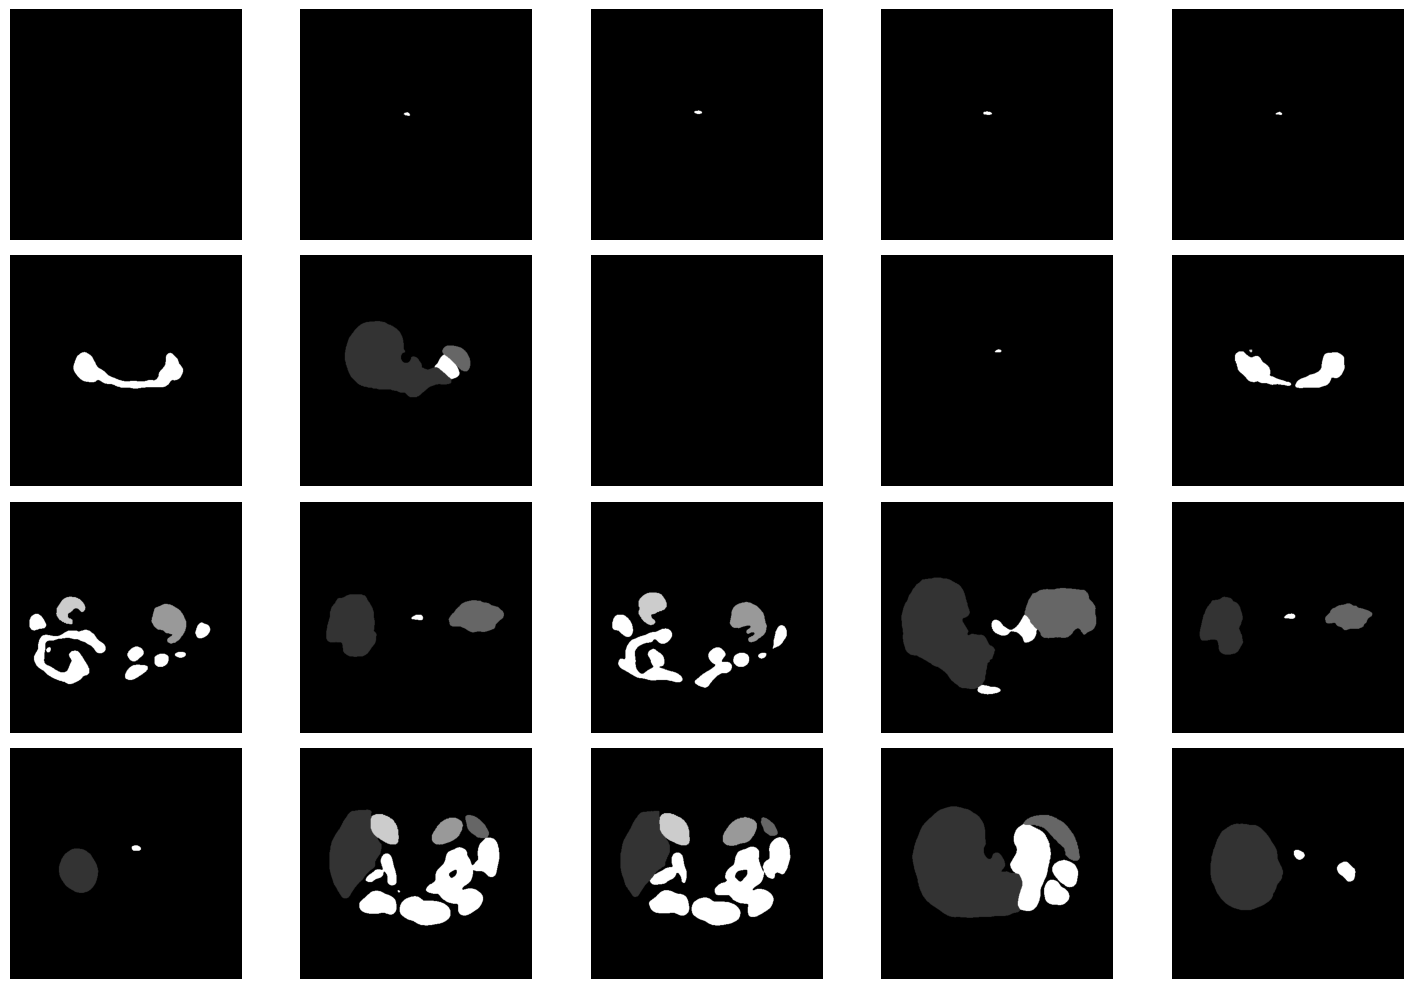

In [5]:
# Function to load NIfTI image
def load_nifti_image(file_path):
    img = sitk.ReadImage(file_path)
    data = sitk.GetArrayFromImage(img)
    return data
# Directory containing NIfTI segmentation files
segmentation_dir = '../Inputs/segmentations/'
# Retrieve all NIfTI file paths from the directory
segmentation_files = [os.path.join(segmentation_dir, fname) for fname in os.listdir(segmentation_dir) if fname.endswith('.nii')]
# Load each NIfTI image and store slices in a list (for demonstration, let's consider random slices of the first few images)
num_images_to_display = 4  # Number of images to consider
num_slices_per_image = 5  # Number of slices per image to display
slices = []
for seg_file in segmentation_files[:num_images_to_display]:
    seg = load_nifti_image(seg_file)
    # print(f"Loaded {seg.shape} from {seg_file}")  # Debug print
    total_slices = seg.shape[0]
    random_slices = random.sample(range(total_slices), min(total_slices, num_slices_per_image))
    for i in random_slices:
        slices.append(seg[i, :, :])
# Plot the slices in a grid
num_rows = num_images_to_display
num_cols = num_slices_per_image
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_slices_per_image + j
        if index < len(slices):
            axes[i, j].imshow(slices[index], cmap='gray')
            axes[i, j].axis('off')  # Remove axis labels
plt.tight_layout()
# Save the plot to a file
output_image_path = '../Outputs/EDA/segmentation_images/segmentation_slices.jpeg'
plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
print(f"Image saved to {output_image_path}")
plt.show()

# Processing and Visualizing Random Slices from NIfTI Segmentation Files by Orientation (Axial, Coronal, Sagittal)

Loaded (483, 512, 512) from ../Inputs/segmentations/10000.nii
Loaded (250, 512, 512) from ../Inputs/segmentations/10109.nii
Loaded (828, 512, 512) from ../Inputs/segmentations/10180.nii
Image saved to ../Outputs/EDA/segmentation_images/segmentation_slices_1.png


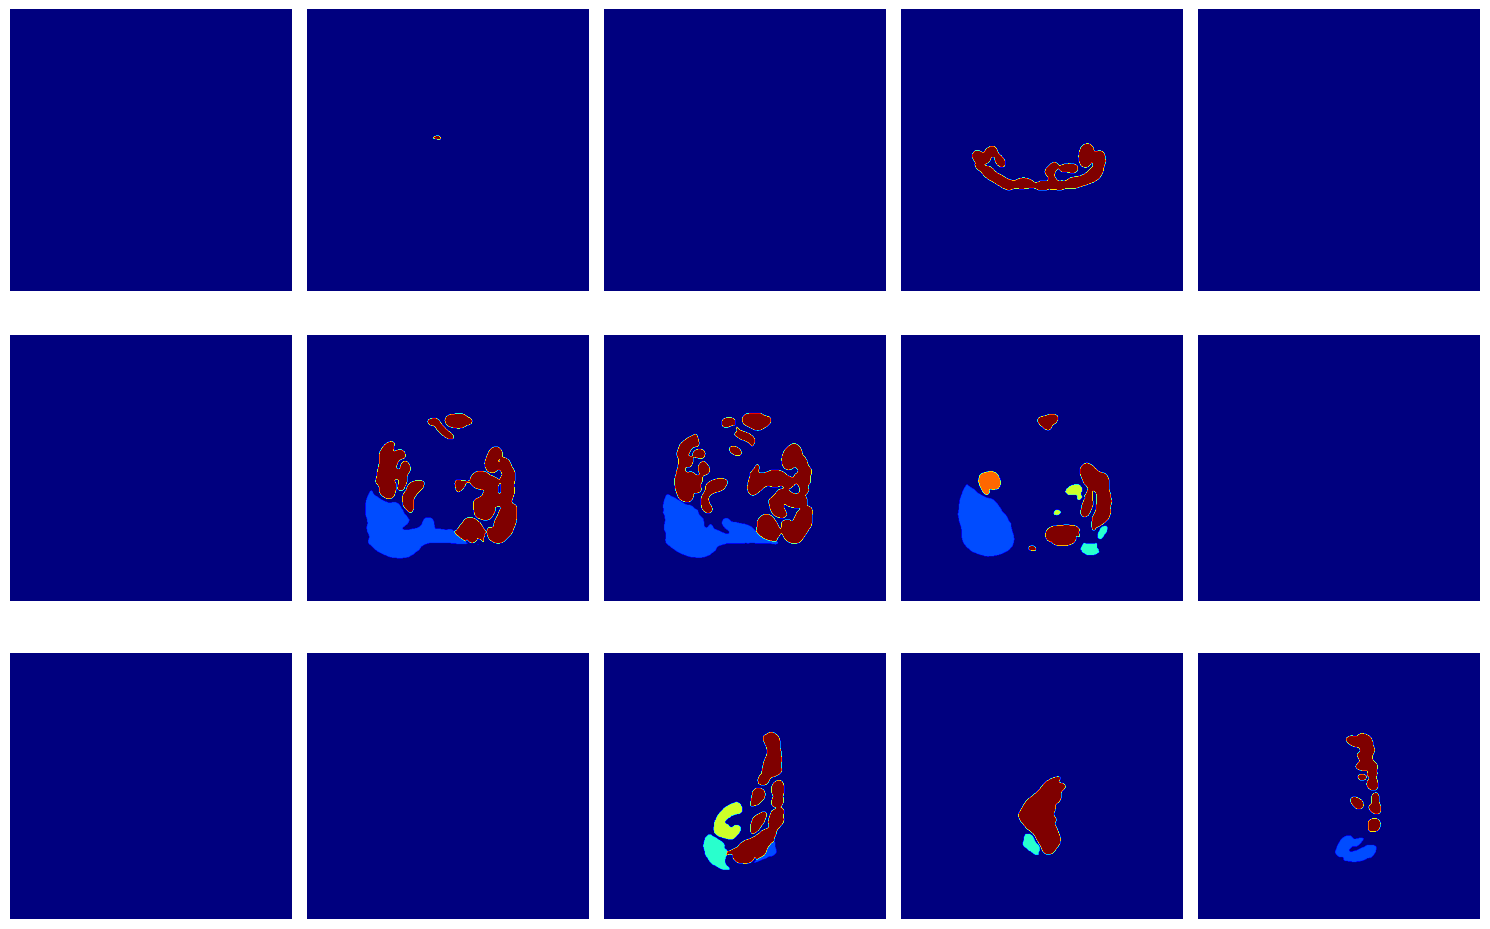

In [7]:
# Function to load NIfTI image
def load_nifti_image(file_path):
    img = sitk.ReadImage(file_path)
    data = sitk.GetArrayFromImage(img)
    return data
# Directory containing NIfTI segmentation files
segmentation_dir = '../Inputs/segmentations/'
# Retrieve all NIfTI file paths from the directory
segmentation_files = [os.path.join(segmentation_dir, fname) for fname in os.listdir(segmentation_dir) if fname.endswith('.nii')]
# Function to get random slices from a given orientation
def get_random_slices(image, orientation, num_slices):
    if orientation == 'Axial':
        total_slices = image.shape[0]
        random_indices = random.sample(range(total_slices), min(total_slices, num_slices))
        slices = [image[i, :, :] for i in random_indices]
    elif orientation == 'Coronal':
        total_slices = image.shape[1]
        random_indices = random.sample(range(total_slices), min(total_slices, num_slices))
        slices = [image[:, i, :] for i in random_indices]
    elif orientation == 'Sagittal':
        total_slices = image.shape[2]
        random_indices = random.sample(range(total_slices), min(total_slices, num_slices))
        slices = [image[:, :, i] for i in random_indices]
    return slices
# Load and store random slices for each orientation
num_images_to_display = 3  # Number of images to consider
num_slices_per_image = 5  # Number of slices per image to display
all_slices = {'Axial': [], 'Coronal': [], 'Sagittal': []}
orientations = ['Axial', 'Coronal', 'Sagittal']
for seg_file in segmentation_files[:num_images_to_display]:
    seg = load_nifti_image(seg_file)
    print(f"Loaded {seg.shape} from {seg_file}")  # Debug print
    for orientation in orientations:
        slices = get_random_slices(seg, orientation, num_slices_per_image)
        all_slices[orientation].extend(slices)
# Plot the slices in a grid
num_rows = len(orientations)
num_cols = num_slices_per_image
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
for i, orientation in enumerate(orientations):
    for j in range(num_cols):
        index = j
        if index < len(all_slices[orientation]):
            axes[i, j].imshow(all_slices[orientation][index], cmap='jet')  # Apply color map for segmentation
            axes[i, j].axis('off')  # Remove axis labels
        if j == 0:
            axes[i, j].set_ylabel(orientation, fontsize=12, rotation=0, labelpad=60)  # Label the rows
plt.tight_layout()
# Save the plot to a file
output_image_path = '../Outputs/EDA/segmentation_images/segmentation_slices_1.png'
plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)
print(f"Image saved to {output_image_path}")
plt.show()

## image_level_labels.csv

In [67]:
print("First few rows of image_level_labels_2024.csv:")
image_labels_df.head()

First few rows of image_level_labels_2024.csv:


,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [68]:
image_labels_df.shape

(15632, 4)

In [69]:
print(f"Injury Type: {image_labels_df['injury_name'].unique()} \
      \nNumber of patients: {image_labels_df['patient_id'].nunique()} \
      \nNumber of series_id: {image_labels_df['series_id'].nunique()}")


Injury Type: ['Active_Extravasation' 'Bowel']       
Number of patients: 269       
Number of series_id: 365


15124


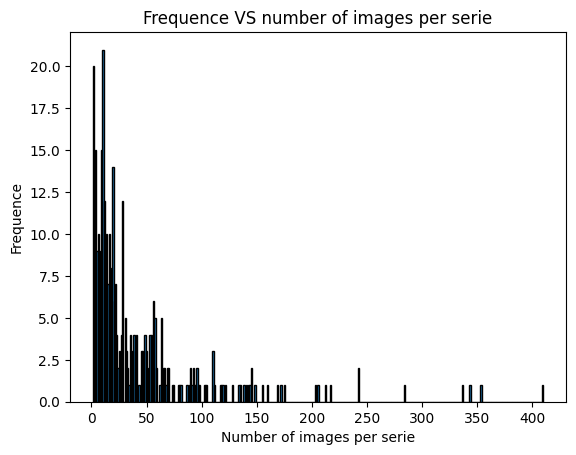

In [70]:
data = image_labels_df.groupby('series_id')['instance_number'].nunique()
print(sum(data))
plt.hist(data, bins=len(data), edgecolor='black')  
plt.xlabel('Number of images per serie')
plt.ylabel('Frequence')
plt.title('Frequence VS number of images per serie')
plt.show()

# Segmentations

In [8]:
files = glob('../Inputs/segmentations/' + '*')
len(files)

206

#### So out of the 3147 patients we have been provided with the segmentations of the 206 patients only. But can we extract the segmentations for the remaining images by using the segmentor model by using which the provided segmentations has been extracted.

# Checking Segmented mask images of series = 10494

In [13]:
# Function to process and save slices from a NIfTI file
def process_nii_to_png(nii_path, output_dir, scale_factor=51):
    # Load the NIfTI image
    nii_img = nib.load(nii_path)
    data = nii_img.get_fdata()
    print(f"Shape of NIfTI data: {data.shape}")
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    images = []
    for i in range(data.shape[2]):
        img = data[:, :, i] * scale_factor
        if img.max() > 0:
            img = np.rot90(img)  # Rotate the image
            
            # Save the image as a PNG file
            newfile = os.path.join(output_dir, f'10494_seg_{str(i).zfill(4)}.png')
            print(f"Saving: {newfile}")
            cv2.imwrite(newfile, img)  
            images.append(img)
    print(f"Total slices processed: {len(images)}")
    return images
# Example usage
nii_path = '../Inputs/segmentations/10494.nii'
output_dir = '../Outputs/EDA/segmentation_images/pngs_masks'
images = process_nii_to_png(nii_path, output_dir)

Shape of NIfTI data: (512, 512, 245)
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0030.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0031.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0032.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0033.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0034.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0035.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0036.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0037.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0038.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0039.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0040.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0041.png
Saving: ../Outputs/EDA/segmentation_images/pngs_masks\10494_seg_0042.png
Saving: ../Out

# Checking a slice of the above series masks 

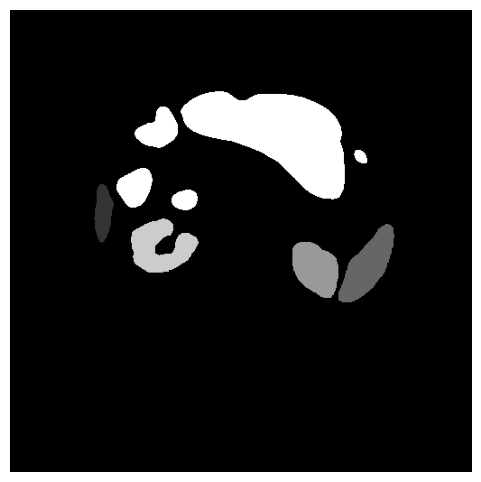

In [18]:
path='../Outputs/EDA/segmentation_images/pngs_masks/10494_seg_0175.png'
plt.figure(figsize=(6,6))
image3 = cv2.imread(path)
plt.imshow(image3)
plt.axis('off')
plt.show()

# Checking gray-scale values for each of the organs in the slice

In [19]:
image = cv2.imread(path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
pixels = np.argwhere(hsv>0)
all_colors = {tuple(image[pixel[0], pixel[1]]) for pixel in pixels}
print("All colors:", all_colors)

All colors: {(51, 51, 51), (255, 255, 255), (102, 102, 102), (204, 204, 204), (153, 153, 153)}


# Trying to plot seperate organs as per gray scale values observed

bowel


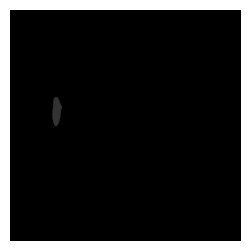

liver


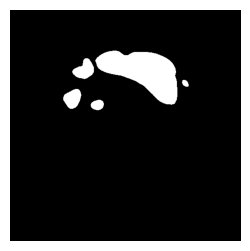

spleen


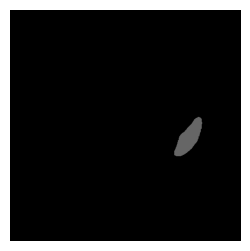

right kidney


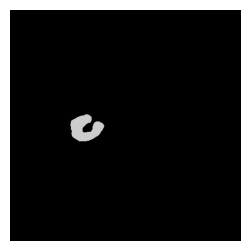

left kidney


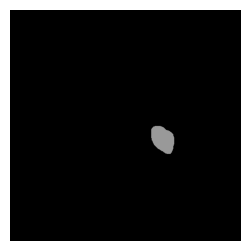

In [20]:
colors=[(51, 51, 51), (255, 255, 255), (102, 102, 102), (204, 204, 204), (153, 153, 153)]
organs=['bowel','liver','spleen','right kidney','left kidney']
for i,color in enumerate(colors):
    lower_color = color
    upper_color = color
    mask = cv2.inRange(image, lower_color, upper_color)
    focus = cv2.bitwise_and(image, image, mask=mask)
    print(organs[i])
    plt.figure(figsize=(3,3))
    plt.imshow(focus)
    plt.axis('off')
    plt.show()